# Monty Hall

**Below is an example of an implementation of the Monty Hall game using native Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

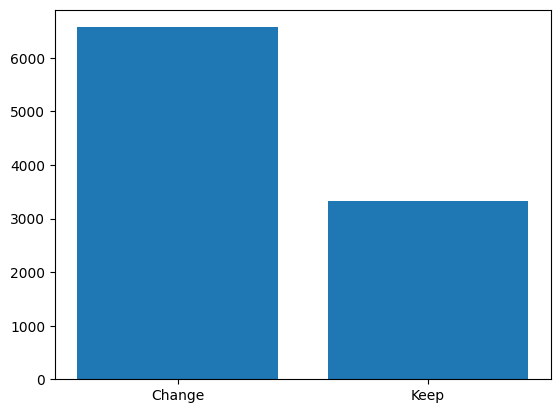

In [ ]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):                                                                 # definition des stragtegies

  doors = ['A', 'B', 'C']
  correct_door = choice(doors)                                                               # random choisi la bonne porte

  first_choice = choice(doors)                                                               # random choisi le 1er choix du candidat
  doors.remove(first_choice)                                                                 #  random enleve la porte choisi des possibilitées

  while True:
    hint_door = choice(doors)                                                                # random propose une porte en indice
    if hint_door != correct_door:                                                            # si cette porte est differante de la bonne
      doors.remove(hint_door)                                                                # random enleve cette porte des choix
      break

  if strategy.lower() == "change":                                                           # strategie de changer de porte
      second_choice = choice(doors)                                                          # le 2eme choix est l'autre porte
  elif strategy.lower() == "keep":                                                           # startegie de garder sa porte
      second_choice = first_choice                                                           # le 2eme choix = le 1er choix
  else:
      raise ValueError("Strategy not recognized!")                                           # si le choix ne coorespond pas aux 2 portes restantes message d'erreur

  return second_choice == correct_door                                                       # retourn quand le 2eme choix coorespond à la bonne porte


def play_many_games(strategy, nb_turns):                                                     # création d'un compteur pour definir une statistique
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))                # retourne dans une list 1 si c'est bon et 0 si non


plot = plt.bar([1, 2],                                                                       # création d'un grap barre pour afficher le resultat
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000))], # test chaque strategie 10 000 fois en faisant une somme des resultats
               tick_label=["Change", "Keep"])                                                # affiche le nom des colonnes

# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar, corresponding to a new strategy called **Alternate**.

A player following it will alternate **randomly** between "Change" and "Keep".


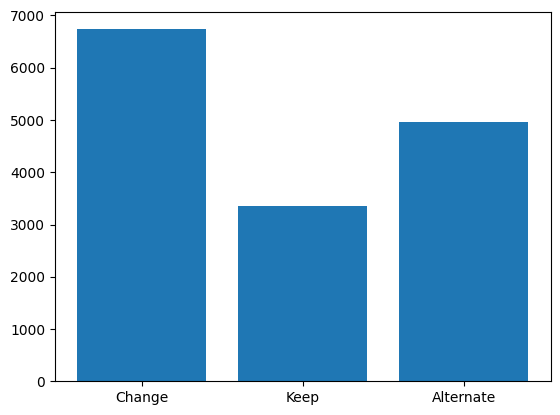

In [ ]:
from re import I
import matplotlib.pyplot as plt
from random import choice
import random


def play_one_game(strategy):

  doors = ['A', 'B', 'C']
  correct_door = choice(doors)

  first_choice = choice(doors)
  doors.remove(first_choice)

  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  elif strategy.lower() == "alternate":
      if random.random() < 0.5:
        second_choice = choice(doors)
      else:
        second_choice = first_choice
  else:
      raise ValueError("Strategy not recognized!")

  return second_choice == correct_door


def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))

plot = plt.bar([1, 2, 3],
                [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000)), sum(play_many_games("Alternate", 10000))],
               tick_label=["Change", "Keep", "Alternate"])



# Mission 3

Now, re-code the Monty Hall game using NumPy. **Do not use Python lists, the built-in `random` module, or any for or while loops in the code**. NumPy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, `play_one_game` and `play_many_games`. In other words, **your NumPy program should now contain only one function**. Obviously, **the visual should be the same as in mission 2**.

In [ ]:
# ce code ne fonctionne pas, pour l'instant !

import numpy as np

def monty_hall_simulation(strategy, num_simulations):

    doors = np.arange(1, 4)

    correct_door = np.random.choice(doors, size=num_simulations)
    print(correct_door)
    first_choice = np.random.choice(doors, size=num_simulations)
    print(first_choice)
    test_door = np.setdiff1d(doors, first_choice)
    revealed_door = np.random.choice(np.setdiff1d(test_door, correct_door))
    print(revealed_door)
    print("_____")
    if strategy.lower() == "change":
        second_choice = np.setdiff1d(doors, revealed_door )
    elif strategy.lower() == "keep":
        second_choice = first_choice
    elif strategy.lower() == "alternate":
        if random.random() < 0.5:
          second_choice = np.setdiff1d(doors, revealed_door )
        else:
          second_choice = first_choice
    else:
        raise ValueError("Strategy not recognized!")

    return second_choice == correct_door




plot = plt.bar([1, 2, 3],
              [sum(monty_hall_simulation("change", 1)), sum(monty_hall_simulation("keep", 1)), sum(monty_hall_simulation("Alternate", 1))],
               tick_label=["Change", "Keep", "Alternate"])


In [ ]:
def monty_hall_simulation(strategy, num_simulations):

  doors = np.arange(1, 4)

  victoire = []

  correct_door = np.random.choice(doors, size=num_simulations)

  first_choice = np.random.choice(doors, size=num_simulations)

  if strategy.lower() == "change":
    victoire = correct_door != first_choice
  elif strategy.lower() == "keep":
    victoire = correct_door == first_choice
  elif strategy.lower() == "alternate":

  else:
        raise ValueError("Strategy not recognized!")

  return sum(victoire)

plot = plt.bar([1, 2, 3],
              [monty_hall_simulation("change", 10000), monty_hall_simulation("keep", 10000), monty_hall_simulation("Alternate", 10000)],
               tick_label=["Change", "Keep", "Alternate"])

NameError: name 'np' is not defined